<a href="https://colab.research.google.com/github/AKASH4671/Anomaly-Detection-Using-Autoencoders/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**libraries**

In [ ]:
!apt-get install -y graphviz
!pip install pydot pydotplus

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model
import keras
import os
import pydot
import graphviz
os.environ["PATH"] += os.pathsep + '/usr/bin/graphviz'
os.kill(os.getpid(), 9) ## dont use until you need to kill the process

**load data & feature engineering**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final Project/part 1/timeseriesdata.csv')
data


,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,1-1-2017 0.00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,1-1-2017 0.05,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,1-1-2017 0.10,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,1-1-2017 0.15,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,1-1-2017 0.20,891.66,934.26,-178.32,-173.72,876.06,-143.39
...,...,...,...,...,...,...,...
377714,8-7-2020 11.55,899.42,919.79,-224.07,-209.77,901.01,-175.15
377715,8-7-2020 12.00,879.9,895.02,-228.04,-211.28,878.08,-176.94
377716,8-7-2020 12.05,887.2,895.7,-230.11,-214.65,885.32,-179.18
377717,8-7-2020 12.10,908.5,916.33,-231.51,-218.09,906.2,-181.96


In [ ]:
data = data.drop(columns=['time'])


In [ ]:
data.dtypes


,0
Cyclone_Inlet_Gas_Temp,object
Cyclone_Material_Temp,object
Cyclone_Outlet_Gas_draft,object
Cyclone_cone_draft,object
Cyclone_Gas_Outlet_Temp,object
Cyclone_Inlet_Draft,object


In [ ]:
# changing data type
object_columns = data.select_dtypes(include = 'object').columns
data[object_columns] = data[object_columns].apply(pd.to_numeric, errors='coerce', downcast='integer')

print(data.dtypes)


Cyclone_Inlet_Gas_Temp      float64
Cyclone_Material_Temp       float64
Cyclone_Outlet_Gas_draft    float64
Cyclone_cone_draft          float64
Cyclone_Gas_Outlet_Temp     float64
Cyclone_Inlet_Draft         float64
dtype: object


In [ ]:
# filling Nan values
data.isna().sum()


,0
Cyclone_Inlet_Gas_Temp,1320
Cyclone_Material_Temp,1591
Cyclone_Outlet_Gas_draft,1321
Cyclone_cone_draft,1320
Cyclone_Gas_Outlet_Temp,1321
Cyclone_Inlet_Draft,1322


In [ ]:
data = data.fillna(method = 'ffill')


<ipython-input-28-85757dc802bf>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method = 'ffill')


In [ ]:
# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)


In [ ]:
data_normalized.shape

(377719, 6)

**train-test-split**

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data_normalized, test_size=0.2, random_state=42)


In [ ]:
X_test.shape

(75544, 6)

In [ ]:
X_train.shape

(302175, 6)

**autoencoder**

In [ ]:
# Define the autoencoder architecture
input_dim = X_train.shape[1]
latent_dim = 2

input_data = keras.layers.Input(shape=(input_dim,))
encoded = keras.layers.Dense(16, activation='relu')(input_data)
encoded = keras.layers.Dense(latent_dim, activation='relu')(encoded)
decoded = keras.layers.Dense(16, activation='relu')(encoded)
decoded = keras.layers.Dense(input_dim, activation='linear')(decoded)

# Compile the autoencoder
autoencoder = keras.Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(X_train, X_train,
                          epochs=10,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(X_test, X_test))

Epoch 1/10
9443/9443 [==============================] - 18s 2ms/step - loss: 0.0517 - val_loss: 0.0154
Epoch 2/10
9443/9443 [==============================] - 17s 2ms/step - loss: 0.0136 - val_loss: 0.0121
Epoch 3/10
9443/9443 [==============================] - 17s 2ms/step - loss: 0.0109 - val_loss: 0.0086
Epoch 4/10
9443/9443 [==============================] - 18s 2ms/step - loss: 0.0079 - val_loss: 0.0074
Epoch 5/10
9443/9443 [==============================] - 18s 2ms/step - loss: 0.0074 - val_loss: 0.0072
Epoch 6/10
9443/9443 [==============================] - 17s 2ms/step - loss: 0.0073 - val_loss: 0.0072
Epoch 7/10
9443/9443 [==============================] - 17s 2ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 8/10
9443/9443 [==============================] - 17s 2ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 9/10
9443/9443 [==============================] - 17s 2ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 10/10
9443/9443 [==============================] - 17s 2ms/step - l

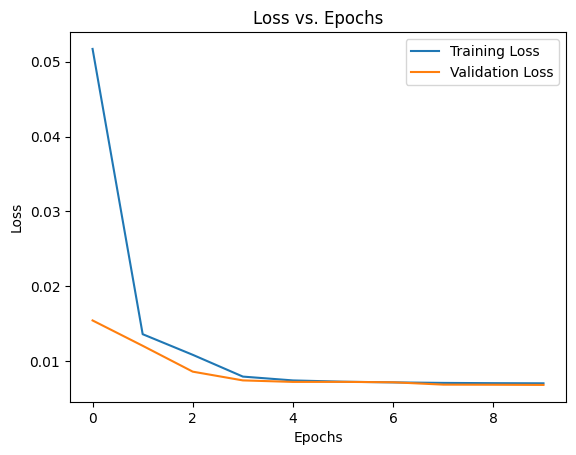

In [ ]:
# Plot the loss vs. epoch curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**architecture**

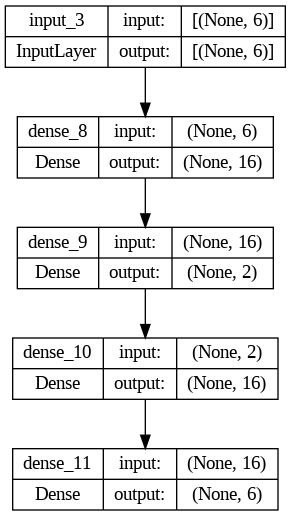

In [ ]:
# autoencoder architecture
plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True, show_layer_names=True)


**reconstruction**

In [ ]:
# Reconstruct the testing data
reconstructed_data = autoencoder.predict(X_test)


2361/2361 [==============================] - 3s 1ms/step


In [ ]:
reconstructed_data.shape

(75544, 6)

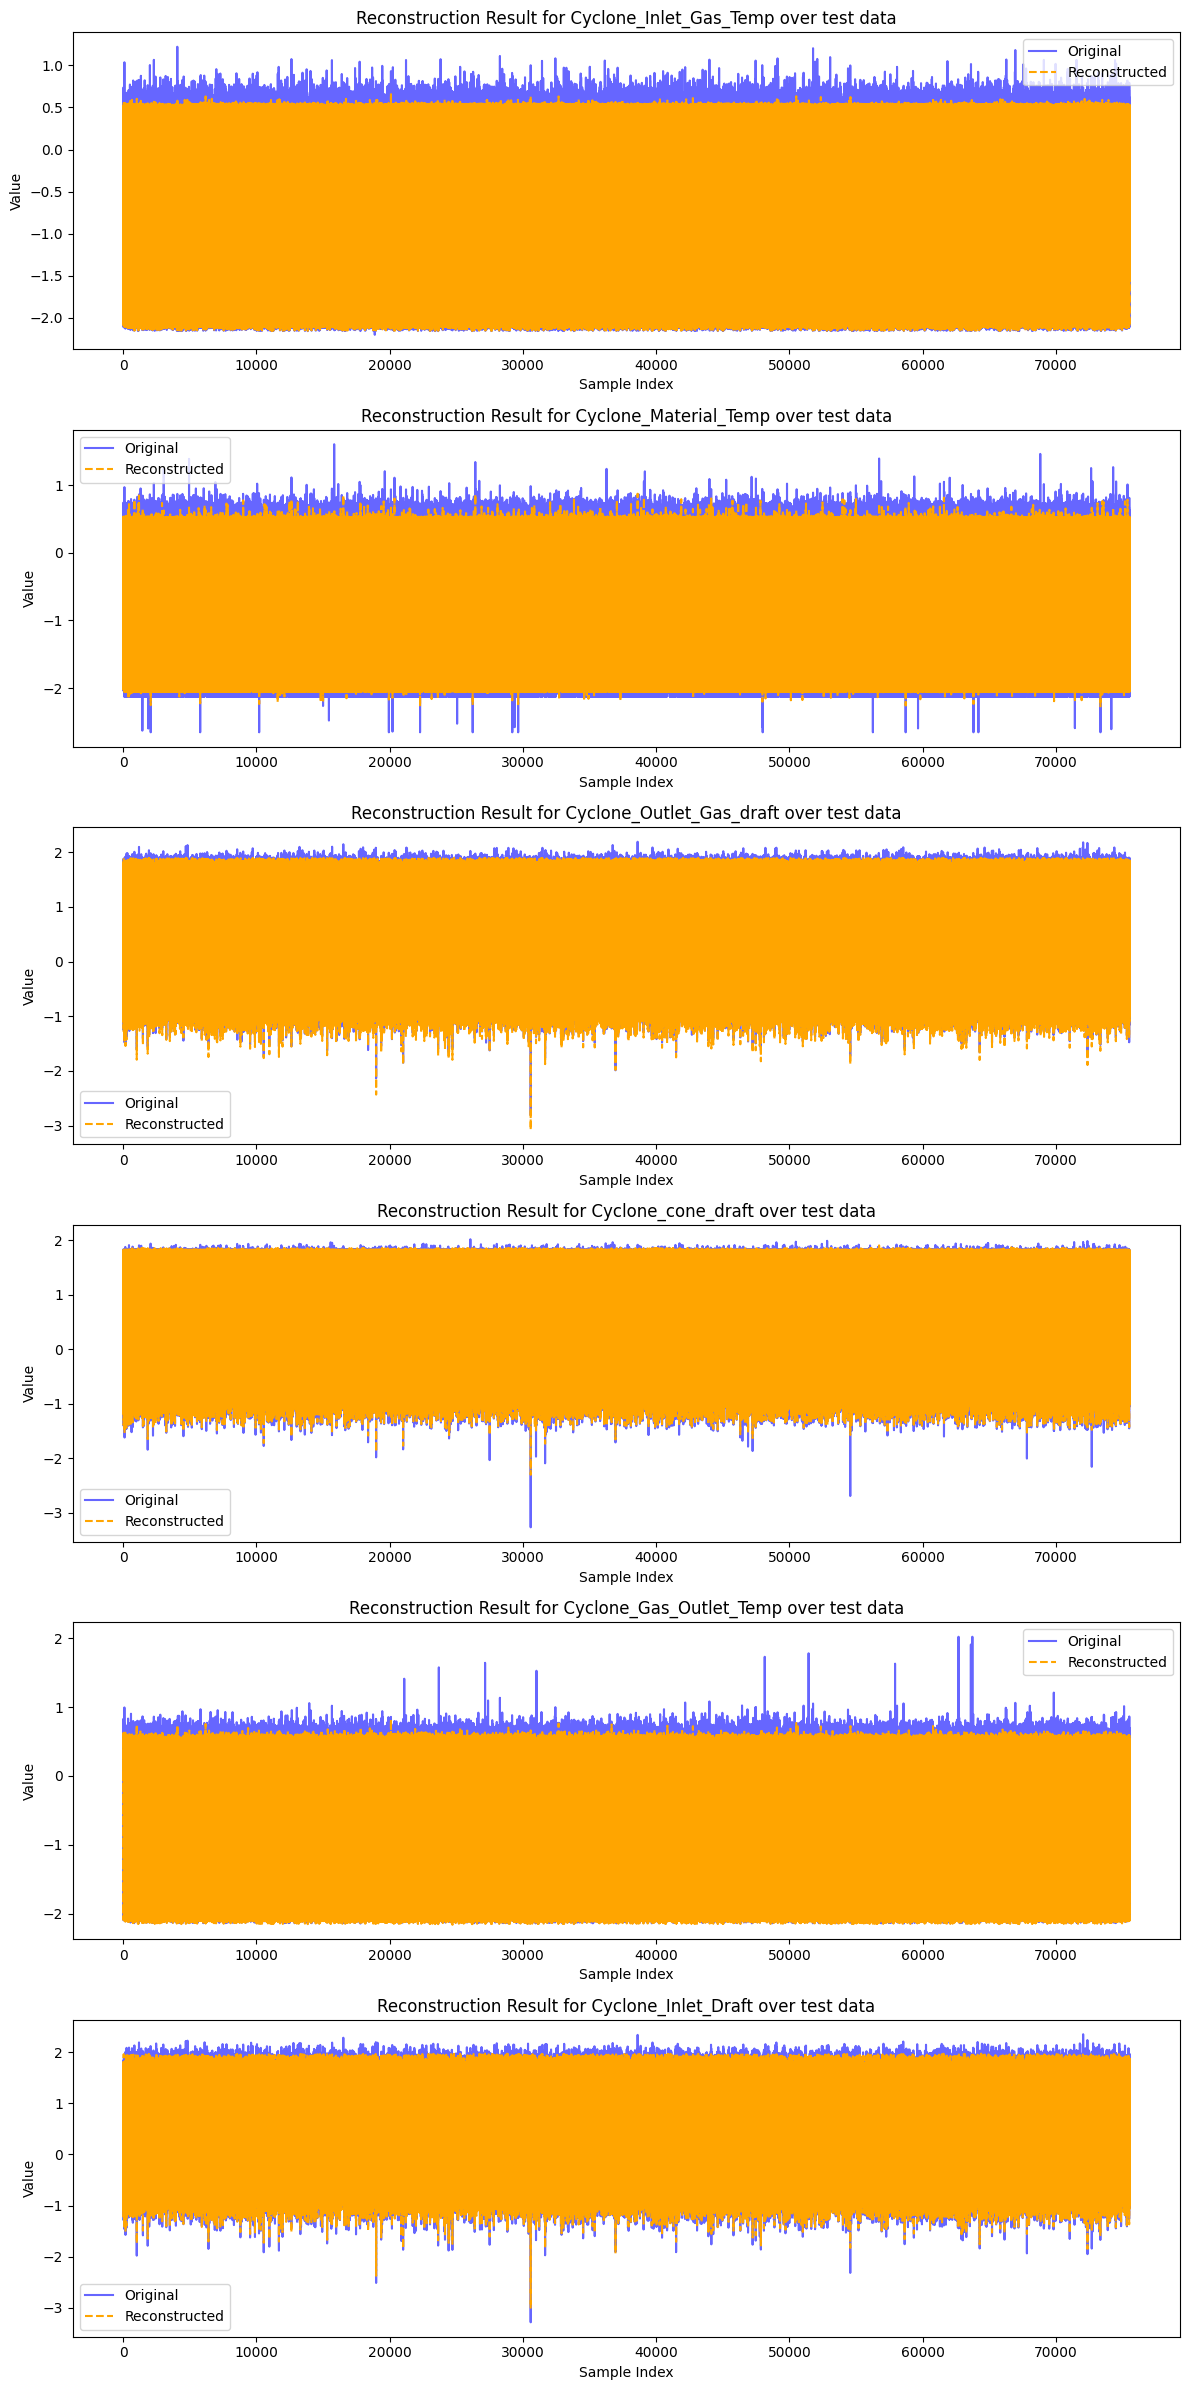

In [ ]:
# visualize reconstruction error

# Define the number of sensors
num_sensors = len(sensor_columns)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_sensors, ncols=1, figsize=(12, 4 * num_sensors))

# Plot each sensor data in a separate subplot
for i, sensor in enumerate(sensor_columns):
    ax = axes[i]

    # Extract the original and reconstructed data for this sensor
    original_data = X_test[:, data.columns.get_loc(sensor)]
    reconstructed_sensor_data = reconstructed_data[:, data.columns.get_loc(sensor)]

    # Plot original vs. reconstructed data
    ax.plot(original_data, label='Original', color='blue', alpha=0.6)
    ax.plot(reconstructed_sensor_data, label='Reconstructed', color='orange', linestyle='dashed')
    ax.set_title(f'Reconstruction Result for {sensor} over test data', fontsize=12)
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Value')
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


**anomalies detection**

In [ ]:
# Calculate reconstruction errors for each sample
mse = np.mean(np.power(X_test - reconstructed_data, 2), axis=1)

# Calculate threshold for anomaly detection
threshold = np.mean(mse) + 3 * np.std(mse)

# Identify anomalies
anomalies_index = np.where(mse > threshold)[0]
anomalies = data.iloc[anomalies_index]

# Print anomalies
print(anomalies)

       Cyclone_Inlet_Gas_Temp  Cyclone_Material_Temp  \
89                     861.42                 905.74   
153                    878.36                 941.69   
173                    879.18                 942.88   
503                    898.09                 961.60   
511                    908.27                 958.83   
...                       ...                    ...   
74758                  866.59                 892.81   
74892                  898.27                 957.93   
75121                  905.38                 932.81   
75283                  416.18                   0.00   
75427                  188.33                   0.00   

       Cyclone_Outlet_Gas_draft  Cyclone_cone_draft  Cyclone_Gas_Outlet_Temp  \
89                      -178.67             -162.63                   855.47   
153                     -179.35             -149.87                   874.87   
173                     -181.51             -133.47                   877.11   
503    

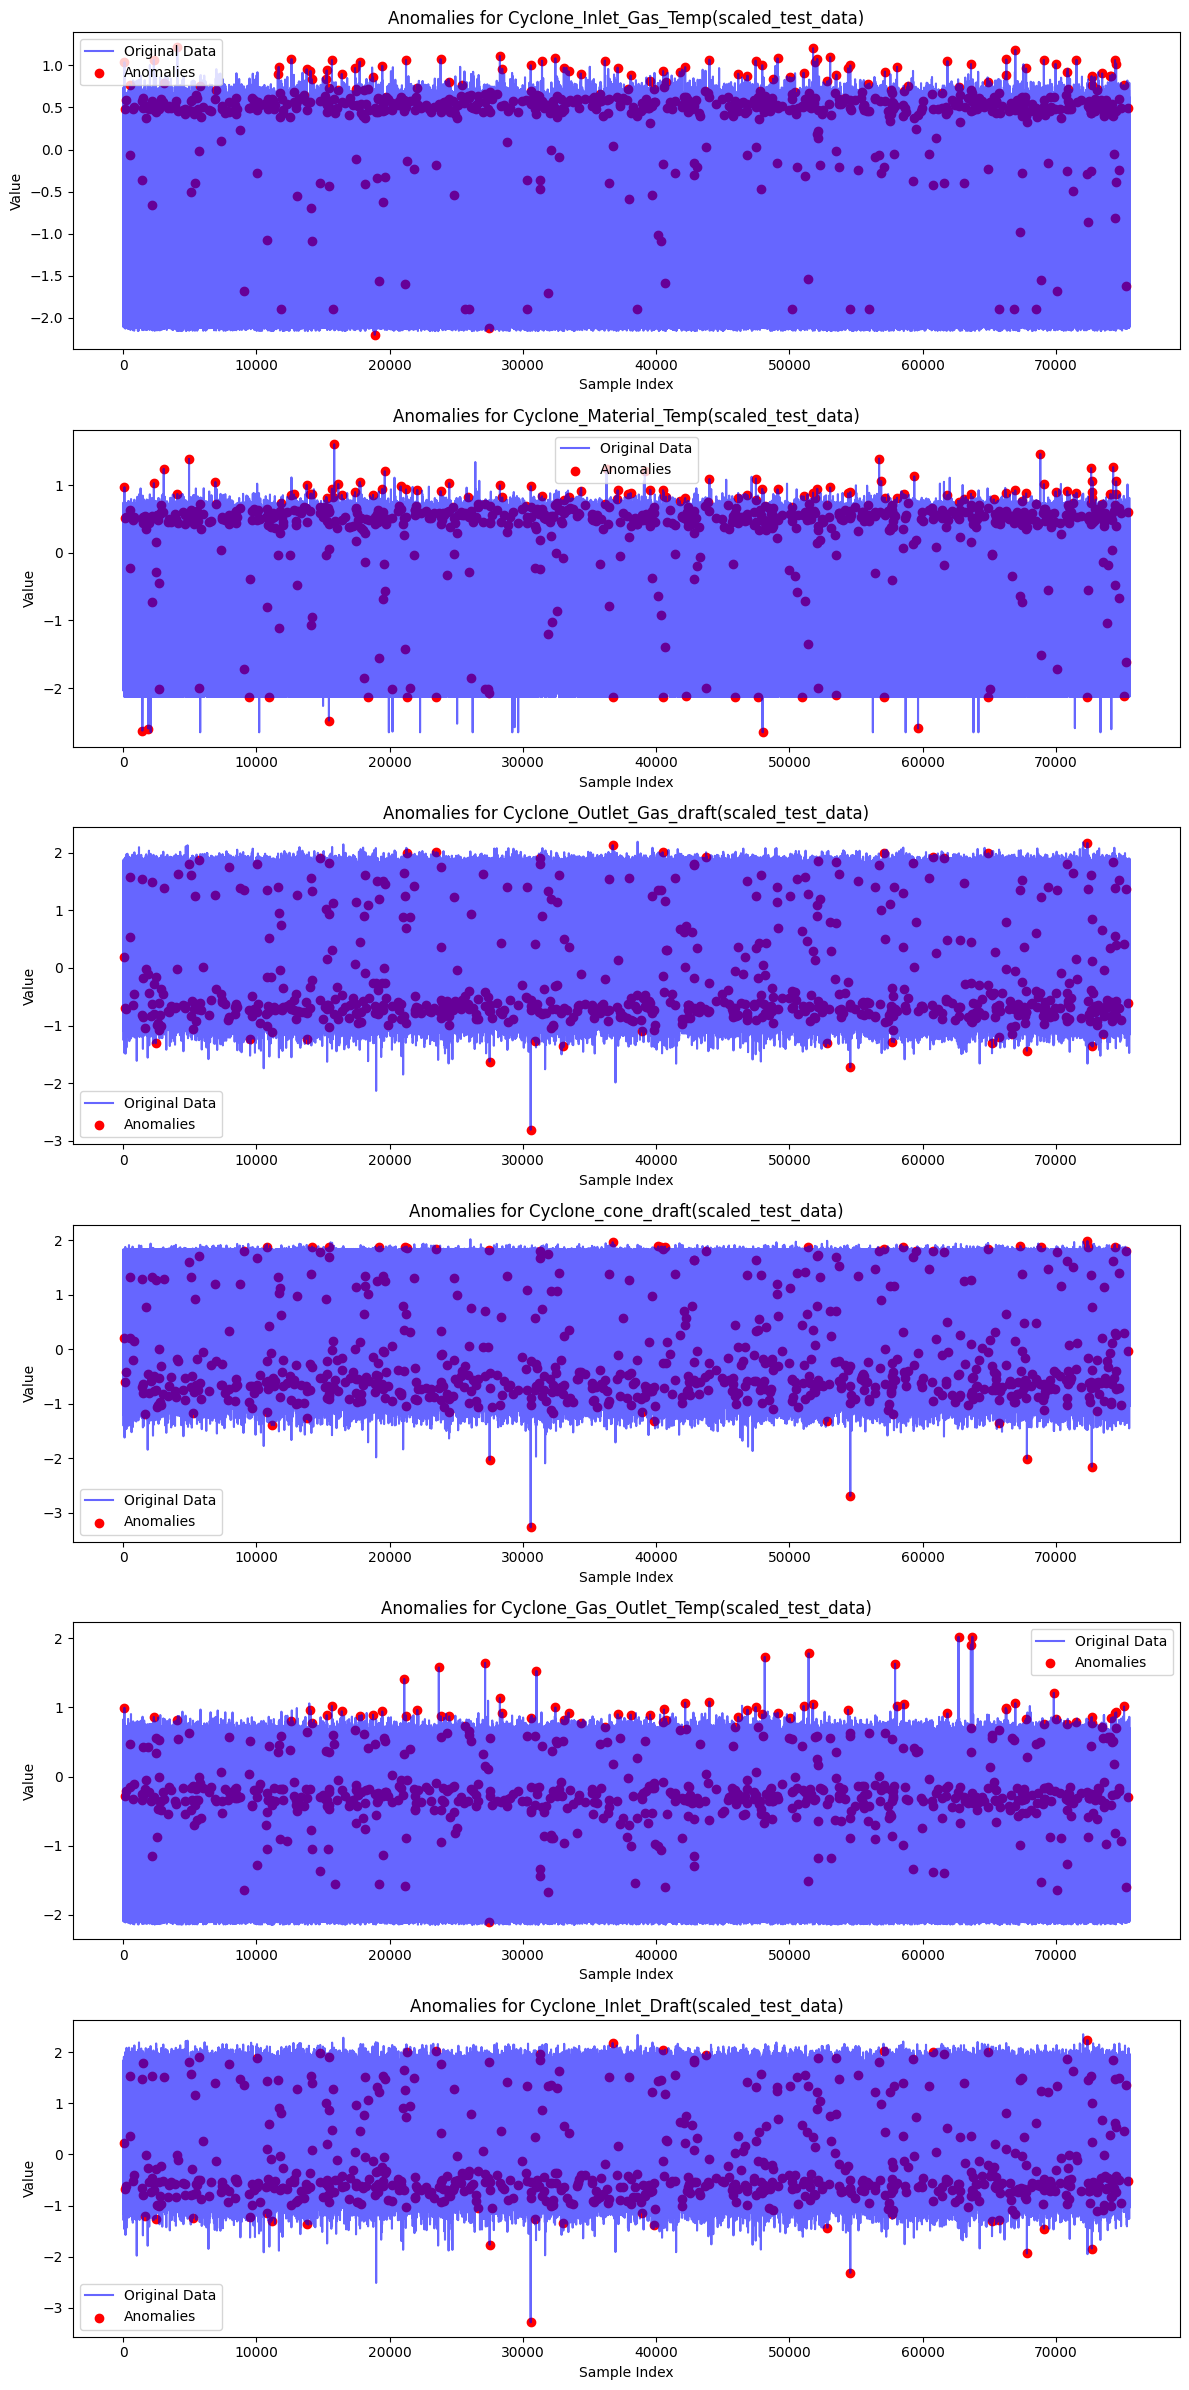

In [ ]:
# Calculate reconstruction errors for each sample in the test data
mse = np.mean(np.power(X_test - reconstructed_data, 2), axis=1)

# Calculate threshold for anomaly detection
threshold = np.mean(mse) + 3 * np.std(mse)

# Identify anomalies in the test data
anomalies_index = np.where(mse > threshold)[0]
anomalies = data.iloc[anomalies_index]

# Print anomalies
print(anomalies)

# Define the number of sensors
sensor_columns = data.columns  # Use the original columns from data
num_sensors = len(sensor_columns)

# Create a figure with subplots for anomalies
fig, axes = plt.subplots(nrows=num_sensors, ncols=1, figsize=(12, 4 * num_sensors))

# Plot each sensor data with anomalies highlighted
for i, sensor in enumerate(sensor_columns):
    ax = axes[i]

    # Extract the original data for this sensor
    original_data = X_test[:, data.columns.get_loc(sensor)]

    # Extract anomalies for this sensor
    if not anomalies.empty:
        anomalies_sensor = anomalies[sensor]
        anomaly_indices = anomalies_index

        # Plot original data
        ax.plot(original_data, label='Original Data', color='blue', alpha=0.6)

        # Highlight anomalies
        ax.scatter(anomaly_indices, original_data[anomaly_indices], color='red', label='Anomalies', marker='o')

    ax.set_title(f'Anomalies for {sensor}(scaled_test_data)', fontsize=12)
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Value')
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()